In [1]:
# histogram is a visual representation of distribution of a continuous feature 

In [1]:
# for images, we can display the frequency of  values for color 
# each of the three RGB channels has values between 0-255
# we can plot these as 3 histograms on top of each other to see how much of each channel there is.
#

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dark_horse  = cv2.imread('DATA/horse.jpg')  # Original 
show_horse  = cv2.cvtColor(dark_horse,cv2.COLOR_BGR2RGB) # converted 

rainbow  = cv2.imread('DATA/rainbow.jpg')
show_rainbow  = cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)

blue_bricks  = cv2.imread('DATA/bricks.jpg')
show_bricks  = cv2.cvtColor(blue_bricks,cv2.COLOR_BGR2RGB)

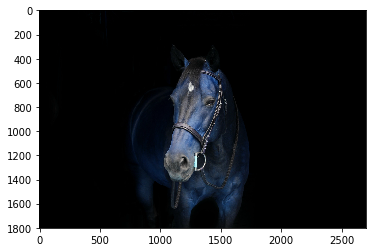

In [4]:
plt.imshow(dark_horse)

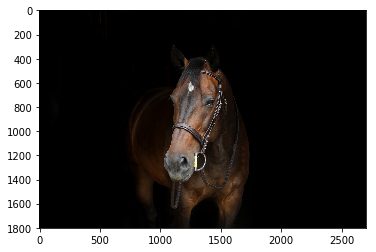

In [5]:
plt.imshow(show_horse)

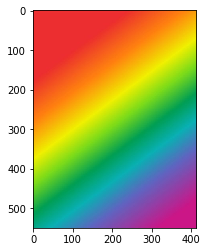

In [6]:
plt.imshow(show_rainbow)

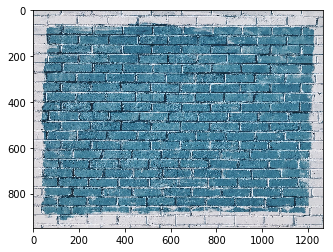

In [7]:
plt.imshow(show_bricks)

In [8]:
# calculate Hist values 

In [9]:
# for OpenCV BGR
hist_values = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256]) 


In [10]:
hist_values.shape

(256, 1)

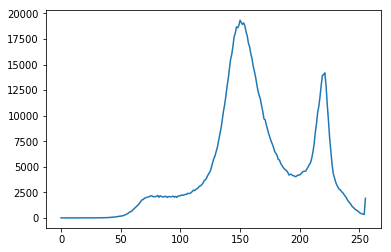

In [11]:
# channel was 0 that is blue 
plt.plot(hist_values)

In [12]:
hist_values  = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])

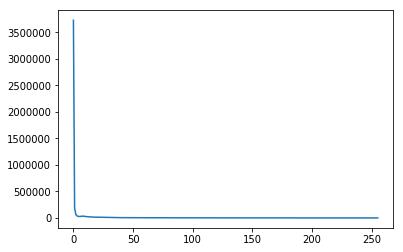

In [13]:
plt.plot(hist_values)

In [17]:
# here we will plot all the 3 color hist at once
#

In [16]:
img = blue_bricks

0 i b col
1 i g col
2 i r col


Text(0.5, 1.0, 'histogram')

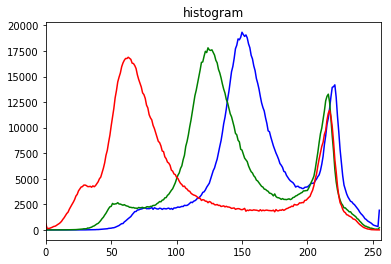

In [21]:
color  = ('b','g','r')

for i,col in enumerate(color):
    print(i,'i',col,'col')
    histr  = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
plt.title('histogram')

In [ ]:
#

0 i b col
1 i g col
2 i r col
(1800, 2700, 3)
number of pixel 14580000


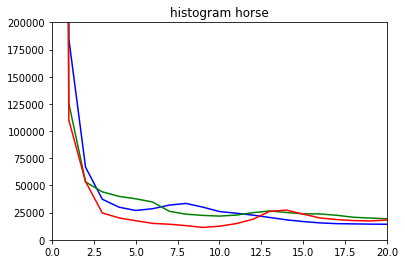

In [33]:
img = dark_horse
color  = ('b','g','r')

for i,col in enumerate(color):
    print(i,'i',col,'col')
    histr  = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,20])
    plt.ylim([0,200000])
plt.title('histogram horse')
print(dark_horse.shape)
print('number of pixel',(dark_horse.shape[0]*dark_horse.shape[1]*dark_horse.shape[2]))

In [34]:
#

# Histogram Eqaulization


In [35]:
# Histogram Eqaulization is a method of contrast adjustment based on the image's histogram 


In [36]:
rainbow  = cv2.imread('DATA/rainbow.jpg')
show_rainbow  = cv2.cvtColor(rainbow,cv2.COLOR_BGR2RGB)

In [37]:
img  = rainbow
img.shape 

(550, 413, 3)

In [38]:
img.shape[:2]

(550, 413)

In [39]:
mask  = np.zeros(img.shape[:2],np.uint8)

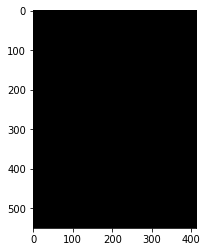

In [40]:
plt.imshow(mask, cmap='gray')

In [41]:
# here we will select a rect in the image as mask
# taking a slice 
mask[300:400,100:400] = 255

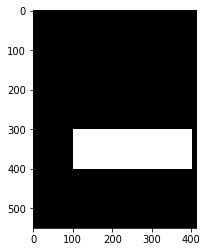

In [43]:
plt.imshow(mask, cmap='gray')

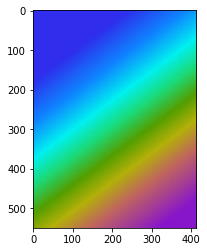

In [44]:
plt.imshow(img)

In [45]:
# this is for hist cal
masked_img  = cv2.bitwise_and(img,img,mask=mask)

In [46]:
# this is to visualize
show_mask_img  = cv2.bitwise_and(show_rainbow,show_rainbow,mask=mask)

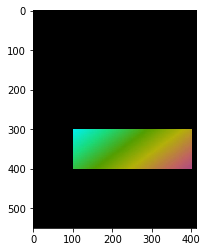

In [47]:
plt.imshow(masked_img)

In [50]:
# with mask
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])


In [51]:
# without mask
hist_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])


Text(0.5, 1.0, 'hist_mask_values_red')

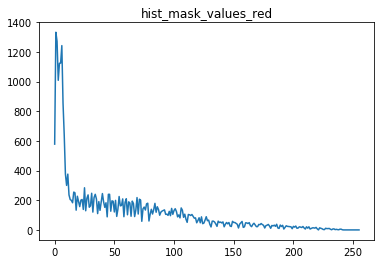

In [53]:
plt.plot(hist_mask_values_red)
plt.title('hist_mask_values_red')

Text(0.5, 1.0, 'hist_values_red')

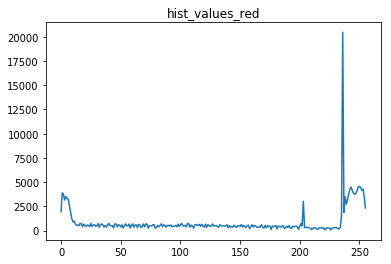

In [54]:
plt.plot(hist_values_red)
plt.title('hist_values_red')

In [55]:
#

In [56]:
gorilla = cv2.imread('DATA/gorilla.jpg',0)

In [57]:
def display(img,cmap=None):
    fig  = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax = plt.imshow(img,cmap)

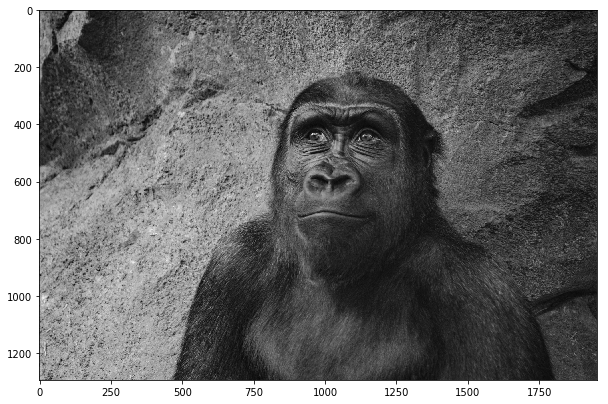

In [58]:
display(gorilla,cmap='gray')

In [59]:
gorilla.shape

(1295, 1955)

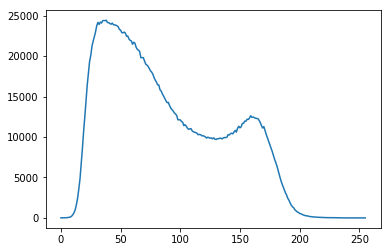

In [61]:
hist_values = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256], ranges=[0,256])
plt.plot(hist_values)

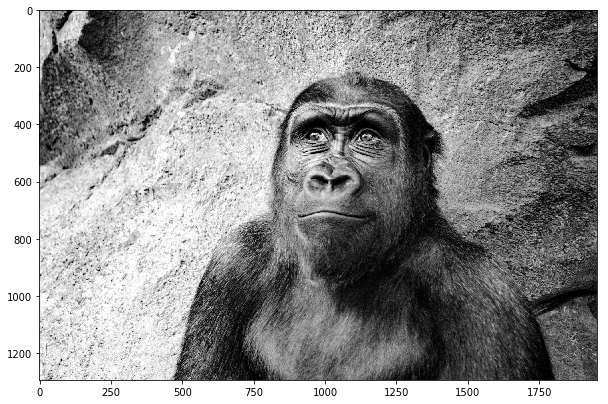

In [63]:
eq_gorilla = cv2.equalizeHist(gorilla)
display(eq_gorilla,cmap='gray')

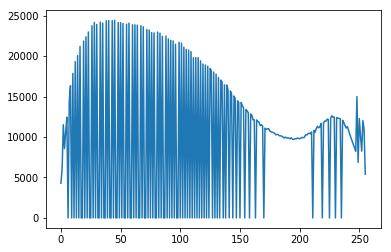

In [64]:
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256], ranges=[0,256])
plt.plot(hist_values)

In [65]:
#

In [66]:
col_gorilla = cv2.imread('DATA/gorilla.jpg')
show_gorilla = cv2.cvtColor(col_gorilla,cv2.COLOR_BGR2RGB)

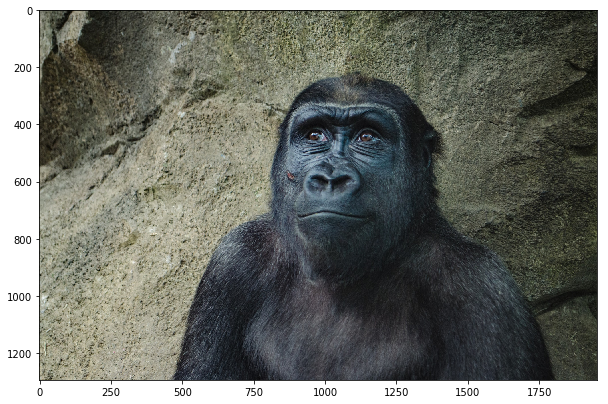

In [67]:
display(show_gorilla)

In [68]:
# to work with hist equlization we need to use HSV
hsv  = cv2.cvtColor(col_gorilla,cv2.COLOR_BGR2HSV)

In [69]:
# now we have hsv version of gorilla, we need the value channel
# x,y,(0=hue,1=saturation,2=value)
hsv[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ..., 
       [196, 198, 185, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [174, 170, 173, ...,  49,  50,  50]], dtype=uint8)

In [71]:
hsv[:,:,2].max()

255

In [72]:
hsv[:,:,2].min()

1

In [73]:
# now we will equalize thsi value channel 
# here we are taking the value channel and equalizing it
# and repalcing the original value 
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

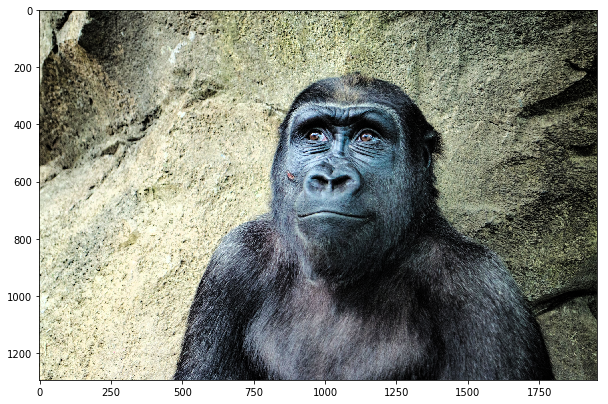

In [74]:
# now we convert hsv to rgb
eq_gorilla = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
display(eq_gorilla)